In [2]:
import pandas as pd
import numpy as np
import pathlib as Pl

# Data analysis

## Loading data 

Loading only one example in order to understand the structure, but doing it so thinking of how the final structure could be implemented

In [6]:
heart_rate_root = r"..\data\heart_rate"
sleep_labels_root = r"..\data\labels"
motion_root = r"..\data\motion"
steps_root = r"..\data\steps"

In [7]:
heart_rate_path = Pl.Path(heart_rate_root)
sleep_labels_path = Pl.Path(sleep_labels_root)
motion_path = Pl.Path(motion_root)
steps_path = Pl.Path(steps_root)

heart_rate_files = list(heart_rate_path.glob("*.txt"))
sleep_labels_files = list(sleep_labels_path.glob("*.txt"))
motion_files = list(motion_path.glob("*.txt"))
steps_files = list(steps_path.glob("*.txt"))

In [8]:
# number of file in each folder
print("heart rate:", len(heart_rate_files))
print("sleep labels:", len(sleep_labels_files))
print("motion:", len(motion_files))
print("steps:", len(steps_files))


heart rate: 31
sleep labels: 31
motion: 31
steps: 31


In [9]:
assert len(heart_rate_files) == len(sleep_labels_files) == len(motion_files) == len(steps_files) # see if this could be added to code later

In [10]:
file = heart_rate_files[0]

In [11]:
file.parts[-1].split("_")[0]

'1066528'

In [12]:
# sort by custom function (using id)
def sort_files(files):
    return sorted(files, key=lambda x: int(x.parts[-1].split("_")[0]))

heart_rate_files = sort_files(heart_rate_files)
sleep_labels_files = sort_files(sleep_labels_files) 
motion_files = sort_files(motion_files)
steps_files = sort_files(steps_files)

In [13]:
class Individual:
    def __init__(self, id, heart_rate, sleep_labels, motion, steps):
        self.id = id
        self.heart_rate = heart_rate
        self.sleep_labels = sleep_labels
        self.motion = motion
        self.steps = steps

    def __str__(self):
        return f"ID: {self.id}, heart rate: {self.heart_rate}, sleep labels: {self.sleep_labels}, motion: {self.motion}, steps: {self.steps}"

    def __repr__(self):
        return f"ID: {self.id}"

In [14]:
# get id from file name
def get_id(file):
    return file.parts[-1].split("_")[0]

In [15]:
individuals = []
for heart_rate, sleep, motion, steps in zip(heart_rate_files, sleep_labels_files, motion_files, steps_files):
    assert get_id(heart_rate) == get_id(sleep) == get_id(motion) == get_id(steps)
    individuals.append(Individual(get_id(heart_rate), heart_rate, sleep, motion, steps))

In [16]:
individuals[0]

ID: 46343

In [17]:
id_46343 = individuals[0]

In [18]:
pd_heartrate = pd.read_csv(id_46343.heart_rate, header=None, names=["time", "bpm"])

In [19]:
pd_heartrate

,time,bpm
0,-556410.36066,57
1,-556408.36062,56
2,-556403.36062,56
3,-556399.36062,57
4,-556389.36062,59
...,...,...
4873,16959.47229,72
4874,16964.47229,74
4875,16970.47229,75
4876,16975.47229,76


In [20]:
pd_heartrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4878 entries, 0 to 4877
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    4878 non-null   float64
 1   bpm     4878 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 76.3 KB


In [21]:
pd_heartrate.describe()

,time,bpm
count,4878.000000,4878.000000
mean,-80602.581664,81.609061
std,162615.856691,9.867894
min,-556410.360660,44.000000
25%,-102166.244797,76.000000
50%,4454.975245,81.000000
75%,10727.968120,86.000000
max,16980.472290,148.000000


In [22]:
pd_sleep = pd.read_csv(id_46343.sleep_labels, header=None, names=["time", "sleep_type"], sep=" ")

In [23]:
pd_sleep

,time,sleep_type
0,0,-1
1,30,-1
2,60,-1
3,90,-1
4,120,-1
...,...,...
562,16860,0
563,16890,0
564,16920,0
565,16950,0


In [24]:
pd_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time        567 non-null    int64
 1   sleep_type  567 non-null    int64
dtypes: int64(2)
memory usage: 9.0 KB


In [25]:
pd_sleep.describe()

,time,sleep_type
count,567.000000,567.000000
mean,8490.000000,2.458554
std,4914.692259,1.654193
min,0.000000,-1.000000
25%,4245.000000,2.000000
50%,8490.000000,2.000000
75%,12735.000000,3.000000
max,16980.000000,5.000000


In [26]:
pd_motion = pd.read_csv(id_46343.motion, header=None, names=["time", "x_acceleration", "y_acceleration", "z_acceleration"], sep=" ")

In [27]:
pd_motion

,time,x_acceleration,y_acceleration,z_acceleration
0,-124489.161050,0.017487,-0.586700,-0.805771
1,-124489.116395,0.018982,-0.589676,-0.809158
2,-124489.115548,0.020966,-0.580887,-0.815048
3,-124489.114691,0.019485,-0.580872,-0.813583
4,-124489.097700,0.016998,-0.587204,-0.806259
...,...,...,...,...
981995,17642.967007,0.505249,0.425720,-0.748764
981996,17642.987576,0.508194,0.429138,-0.750717
981997,17643.006946,0.508179,0.427200,-0.747284
981998,17643.026865,0.505737,0.427673,-0.749741


In [28]:
pd_motion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982000 entries, 0 to 981999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   time            982000 non-null  float64
 1   x_acceleration  982000 non-null  float64
 2   y_acceleration  982000 non-null  float64
 3   z_acceleration  982000 non-null  float64
dtypes: float64(4)
memory usage: 30.0 MB


In [29]:
pd_motion.describe()

,time,x_acceleration,y_acceleration,z_acceleration
count,982000.000000,982000.000000,982000.000000,982000.000000
mean,6587.331431,-0.011549,-0.118914,-0.228737
std,14402.383673,0.402605,0.368449,0.797639
min,-124489.161050,-1.779373,-1.854248,-2.519806
25%,2929.332716,-0.339981,-0.204666,-0.883026
50%,7834.357713,-0.054886,-0.130325,-0.789322
75%,12738.139149,0.447220,-0.028229,0.891815
max,17643.046417,2.343048,3.753906,3.867004


In [30]:
pd_steps = pd.read_csv(id_46343.steps, header=None, names=["time", "step_count"], sep=",")

In [31]:
pd_steps

,time,step_count
0,-604539,0
1,-603939,0
2,-603339,0
3,-602739,0
4,-602139,0
...,...,...
1398,234261,0
1399,234861,0
1400,235461,0
1401,236061,219


In [32]:
pd_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time        1403 non-null   int64
 1   step_count  1403 non-null   int64
dtypes: int64(2)
memory usage: 22.1 KB


In [33]:
pd_steps.describe()

,time,step_count
count,1403.000000,1403.000000
mean,-183939.000000,53.003564
std,243093.315416,182.456043
min,-604539.000000,0.000000
25%,-394239.000000,0.000000
50%,-183939.000000,0.000000
75%,26361.000000,9.500000
max,236661.000000,2338.000000


## Analysing time/date

Given the dataset's [sleepdata's page](https://sleepdata.org/datasets/sleepaccel):

```
specific times/dates were removed from the files by adjusting all times to be relative to the start of the PSG signal (0 = PSG start; all other times = seconds since PSG start)
```

In [34]:
print("analysis of individual 46343")
print("heartrate time range:", pd_heartrate["time"].min(), pd_heartrate["time"].max())
print("sleep time range:", pd_sleep["time"].min(), pd_sleep["time"].max())
print("motion time range:", pd_motion["time"].min(), pd_motion["time"].max())
print("steps time range:", pd_steps["time"].min(), pd_steps["time"].max())

analysis of individual 46343
heartrate time range: -556410.36066 16980.47229
sleep time range: 0 16980
motion time range: -124489.16105 17643.046417
steps time range: -604539 236661


In [36]:
import matplotlib.pyplot as plt

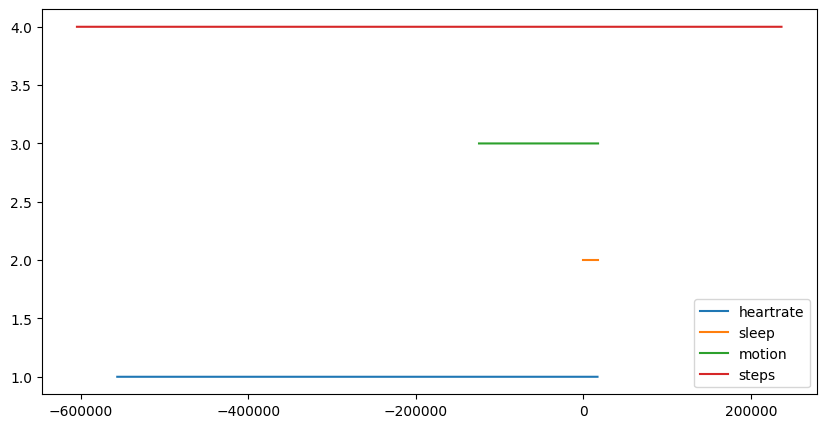

In [40]:
# plot time ranges of all data
plt.figure(figsize=(10, 5))
plt.plot(pd_heartrate["time"], np.ones(len(pd_heartrate)), label="heartrate")
plt.plot(pd_sleep["time"], np.ones(len(pd_sleep)) * 2, label="sleep")
plt.plot(pd_motion["time"], np.ones(len(pd_motion)) * 3, label="motion")
plt.plot(pd_steps["time"], np.ones(len(pd_steps)) * 4, label="steps")
plt.legend()
plt.show()

In [41]:
# reduce data to sleep time range
pd_heartrate_sleep = pd_heartrate[(pd_heartrate["time"] >= pd_sleep["time"].min()) & (pd_heartrate["time"] <= pd_sleep["time"].max())]
pd_motion_sleep = pd_motion[(pd_motion["time"] >= pd_sleep["time"].min()) & (pd_motion["time"] <= pd_sleep["time"].max())]
pd_steps_sleep = pd_steps[(pd_steps["time"] >= pd_sleep["time"].min()) & (pd_steps["time"] <= pd_sleep["time"].max())]

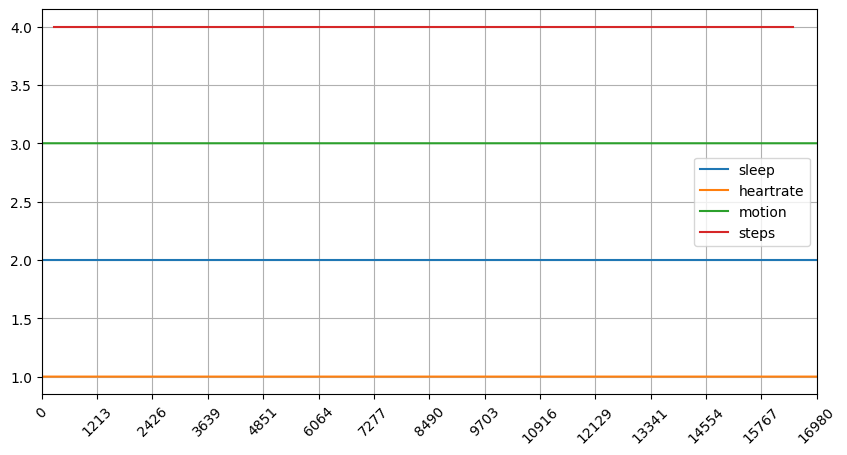

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(pd_sleep["time"], np.ones(len(pd_sleep)) * 2, label="sleep")
plt.plot(pd_heartrate_sleep["time"], np.ones(len(pd_heartrate_sleep)), label="heartrate")
plt.plot(pd_motion_sleep["time"], np.ones(len(pd_motion_sleep)) * 3, label="motion")
plt.plot(pd_steps_sleep["time"], np.ones(len(pd_steps_sleep)) * 4, label="steps")
plt.xlim(pd_sleep["time"].min(), pd_sleep["time"].max())
plt.xticks(np.linspace(pd_sleep["time"].min(), pd_sleep["time"].max(), 15), rotation=45)
plt.legend()
plt.grid()
plt.show()

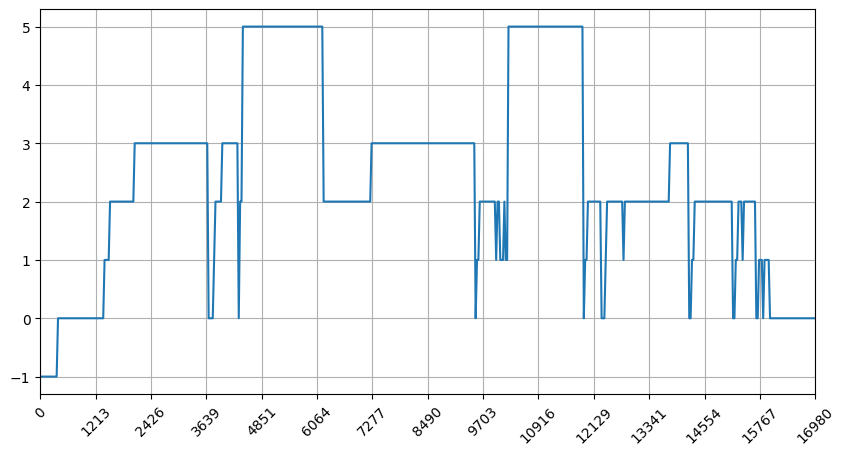

In [56]:
# plot sleep data
plt.figure(figsize=(10, 5))
plt.plot(pd_sleep["time"], pd_sleep["sleep_type"])
plt.xlim(pd_sleep["time"].min(), pd_sleep["time"].max())
plt.xticks(np.linspace(pd_sleep["time"].min(), pd_sleep["time"].max(), 15), rotation=45)
plt.grid()
plt.show()


Stage: 0-5
- wake = 0
- N1 = 1 
- N2 = 2
- N3 = 3
- REM = 5

[Stages of Sleep: What Happens in a Sleep Cycle](https://www.sleepfoundation.org/stages-of-sleep#:~:text=a%20person%20up.-,Stage%201,with%20periods%20of%20brief%20movements.)

```
Stage 1, also called N1, is essentially when a person first falls asleep. This stage normally lasts just one to seven minutes. [...]

During stage 2, or N2, the body enters a more subdued state including a drop in temperature, relaxed muscles, and slowed breathing and heart rate. At the same time, brain waves show a new pattern and eye movement stops. On the whole, brain activity slows, but there are short bursts of activity that actually help resist being woken up by external stimuli. [...]

Stage 3 sleep is also known as N3 or deep sleep, and it is harder to wake someone up if they are in this phase. Muscle tone, pulse, and breathing rate decrease in N3 sleep as the body relaxes even further. [...]

During REM sleep, brain activity picks up, nearing levels seen when you are awake. At the same time, the body experiences atonia, which is a temporary paralysis of the muscles, with two exceptions: the eyes and the muscles that control breathing. Even though the eyes are closed, they can be seen moving quickly, which is how this stage gets its name. [...]
```

In [62]:
pd_sleep["sleep_type"].value_counts()

sleep_type
 2    170
 3    156
 5    114
 0     85
 1     29
-1     13
Name: count, dtype: int64

Observation: data values -1, not in data dictionary. A point to remove. Could other data be considered awake? Having most of the series as awaken be problematic? Maybe include two models = awake/asleep, type of sleep

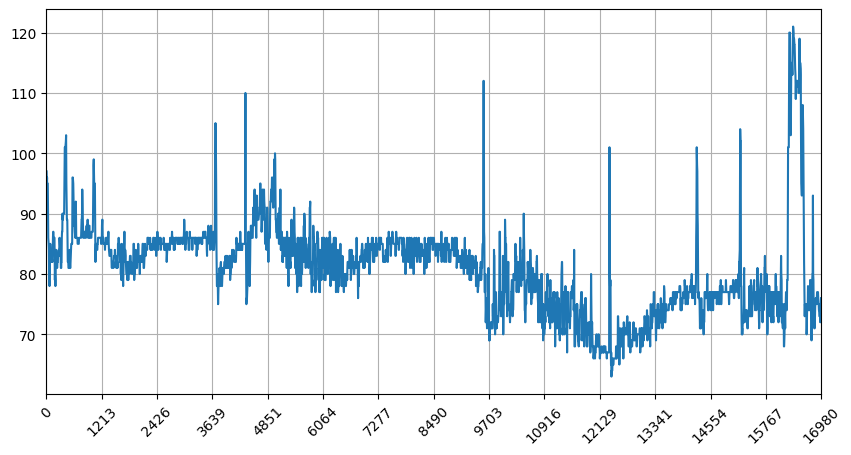

In [57]:
# plot heartrarte sleep data
plt.figure(figsize=(10, 5))
plt.plot(pd_heartrate_sleep["time"], pd_heartrate_sleep["bpm"])
plt.xlim(pd_sleep["time"].min(), pd_sleep["time"].max())
plt.xticks(np.linspace(pd_sleep["time"].min(), pd_sleep["time"].max(), 15), rotation=45)
plt.grid()
plt.show()


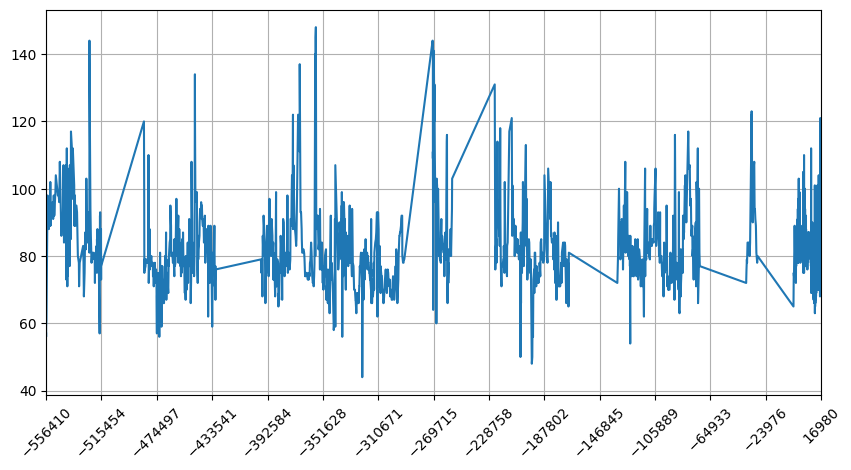

In [58]:
# plot heartrate date
plt.figure(figsize=(10, 5))
plt.plot(pd_heartrate["time"], pd_heartrate["bpm"])
plt.xlim(pd_heartrate["time"].min(), pd_heartrate["time"].max())
plt.xticks(np.linspace(pd_heartrate["time"].min(), pd_heartrate["time"].max(), 15), rotation=45)
plt.grid()
plt.show()


In [64]:
# time spent in each dataset in hours
print("time spent in each dataset in hours")
print("heartrate:", (pd_heartrate["time"].max() - pd_heartrate["time"].min()) / 3600)
print("sleep:", (pd_sleep["time"].max() - pd_sleep["time"].min()) / 3600)
print("motion:", (pd_motion["time"].max() - pd_motion["time"].min()) / 3600)
print("steps:", (pd_steps["time"].max() - pd_steps["time"].min()) / 3600)

time spent in each dataset in hours
heartrate: 159.27523137499998
sleep: 4.716666666666667
motion: 39.48116874083333
steps: 233.66666666666666
